
# CS110 Spring 2020 - Assignment 4
# Decoding relationships between genes

## Notes on the Submission Materials

1. Your **first resource** should be a PDF file created from the Jupyter notebook template provided in these instructions. If your name is “Dumbledore”, your PDF should be named “Dumbledore.pdf”. **For best results, follow [this guide](https://docs.google.com/document/d/1SJbsx0r2Kh0VsmF_t_q84awPK-88yZlK8nO7pHWtFBA/edit?usp=sharing) to convert the Jupyter Notebook to a PDF. Regardless of the method you choose, make sure that, in your PDF submission, texts can be selected/ highlighted.**
2. Your **second resource** must be a single Jupyter Notebook named “Dumbledore.ipynb”. Alternatively, you can also submit a zip file that includes your Jupyter notebook, but please make sure to name it “Dumbledore.zip” (the Jupyter notebook submitted as part of such zip file should still be named “Dumbledore.ipynb”!).
    * You can add more cells to expand your answers but do not copy cells within the notebook.
    * Only submit one .ipynb file (as opposed to multiple different .ipynb files).
    * If you submit a .zip file, it needs to be a flat directory.


## Notes on the Grading Rubrics

* This is a strictly individual assignment. Everything you submit must reflect your own writing and coding. Please do refer to the course guidelines on the syllabus namely in what constitutes plagiarism. 
* All the tasks will be graded on the indicated companion LOs; please make sure to consult their descriptions and rubrics in the course syllabus to maximally align your approach to them. You will not be penalized for not attempting the optional challenge.
* As per the course’s policy on the syllabus, you will need to footnote at least three HCs by including a meaningful justification of the application of each HC and explaining in detail how they enabled you to complete this assignment. Please refer to [these guidelines](https://docs.google.com/document/d/1s7yOVOtMIaHQdKLeRmZbq1gRqwJKfezBsfru9Q6PcHw/edit) on how to incorporate HCs in your work.


## Overview
Gene Mutation is a prevailing and computationally intensive research topic in Genetics. For this assignment, assume that you have been hired by a biotechnology company to work on a gene mutation research project, and your first task is to write a Python program to investigate a genealogical mutation sequencing.


In this program, a gene is described by a string of letters, with a letter being chosen from the set ${A, C, G, T}$. A mutation is relatively rare but it can occur in which there is a small probability of either inserting a new character, deleting an existing character, or changing to a new character randomly. We can refer to these probabilities by $p_i, p_d$, and $p_c$, respectively.


Now, suppose the starting point is a given string that undergoes a mutation process. This mutation created two other strings, the child strings of the first string. Each of these two new strings can undergo mutations by which they will change from their parent. In turn, the two-child strings, mutate and create 2 new substrings each, resulting in four grandchild strings from the original gene sequencing string. We can easily visualize the sequence of mutations if we were to draw a genealogy binary tree relating strings to their parent and grandparent strings.

As a result of these mutations, we now have 7 strings but unfortunately, the order of the strings has been lost due to a glitch in the gene sequencing generation program. Therefore, your first task in the project is to recover the genealogy tree for the following set of 7 strings labelled with lowercase letters:
``` python
('a', 'AGTTATGTGTCAGAGCAAAAGATTCCTCATCTAGCGGTCGCAAGTCATTGCC'),
('b', 'AAGTTATTTGCTCACAGGGAACGAATCCAGCTCTGCGGTCGAGGCCACATTGCC'),
('c', 'AGTTATTTTCAGAGAAATGATTCCTTCTCACCGGTCGAGCCAGTGCC'),
('d', 'AGTTTATGTGTCAGAAGCAAAAGATTACTAATCTACGCGTCGCAAGGTCTATTCC'),
('e', 'ACAGCTTATATAGCTCATAGGGAGCGAAATCCAGCCCCGCGGTGCGAGGCCCCTTGTCGC'),
('f', 'AAGTATATGGCACGAGGGAACAGTATCAGCTCTTCGGATAAAGGCCACAGTGCC'),
('g', 'AGTTATGTGTCACAGGCAAAAGATCCTTCTCTGCGGTCGAACCCATTGCC')
```


Henceforth, the set of strings created with the gene-sequencing generation program will be referred to as `Set_Strings`.

# Assignment Questions

Each of the questions below will be graded on the CS110 LOs included inside square brackets:

## Task 1. [#responsibility] [appropriate LO for the make-up work] 

Take a screenshot of your CS110 dashboard on Forum where the following is visible: 
* your name.
* your absences for the course have been set to excused up to the end of week 11 (inclusively). 

Submit this screenshot as a PNG file on your Jupyter notebook. 


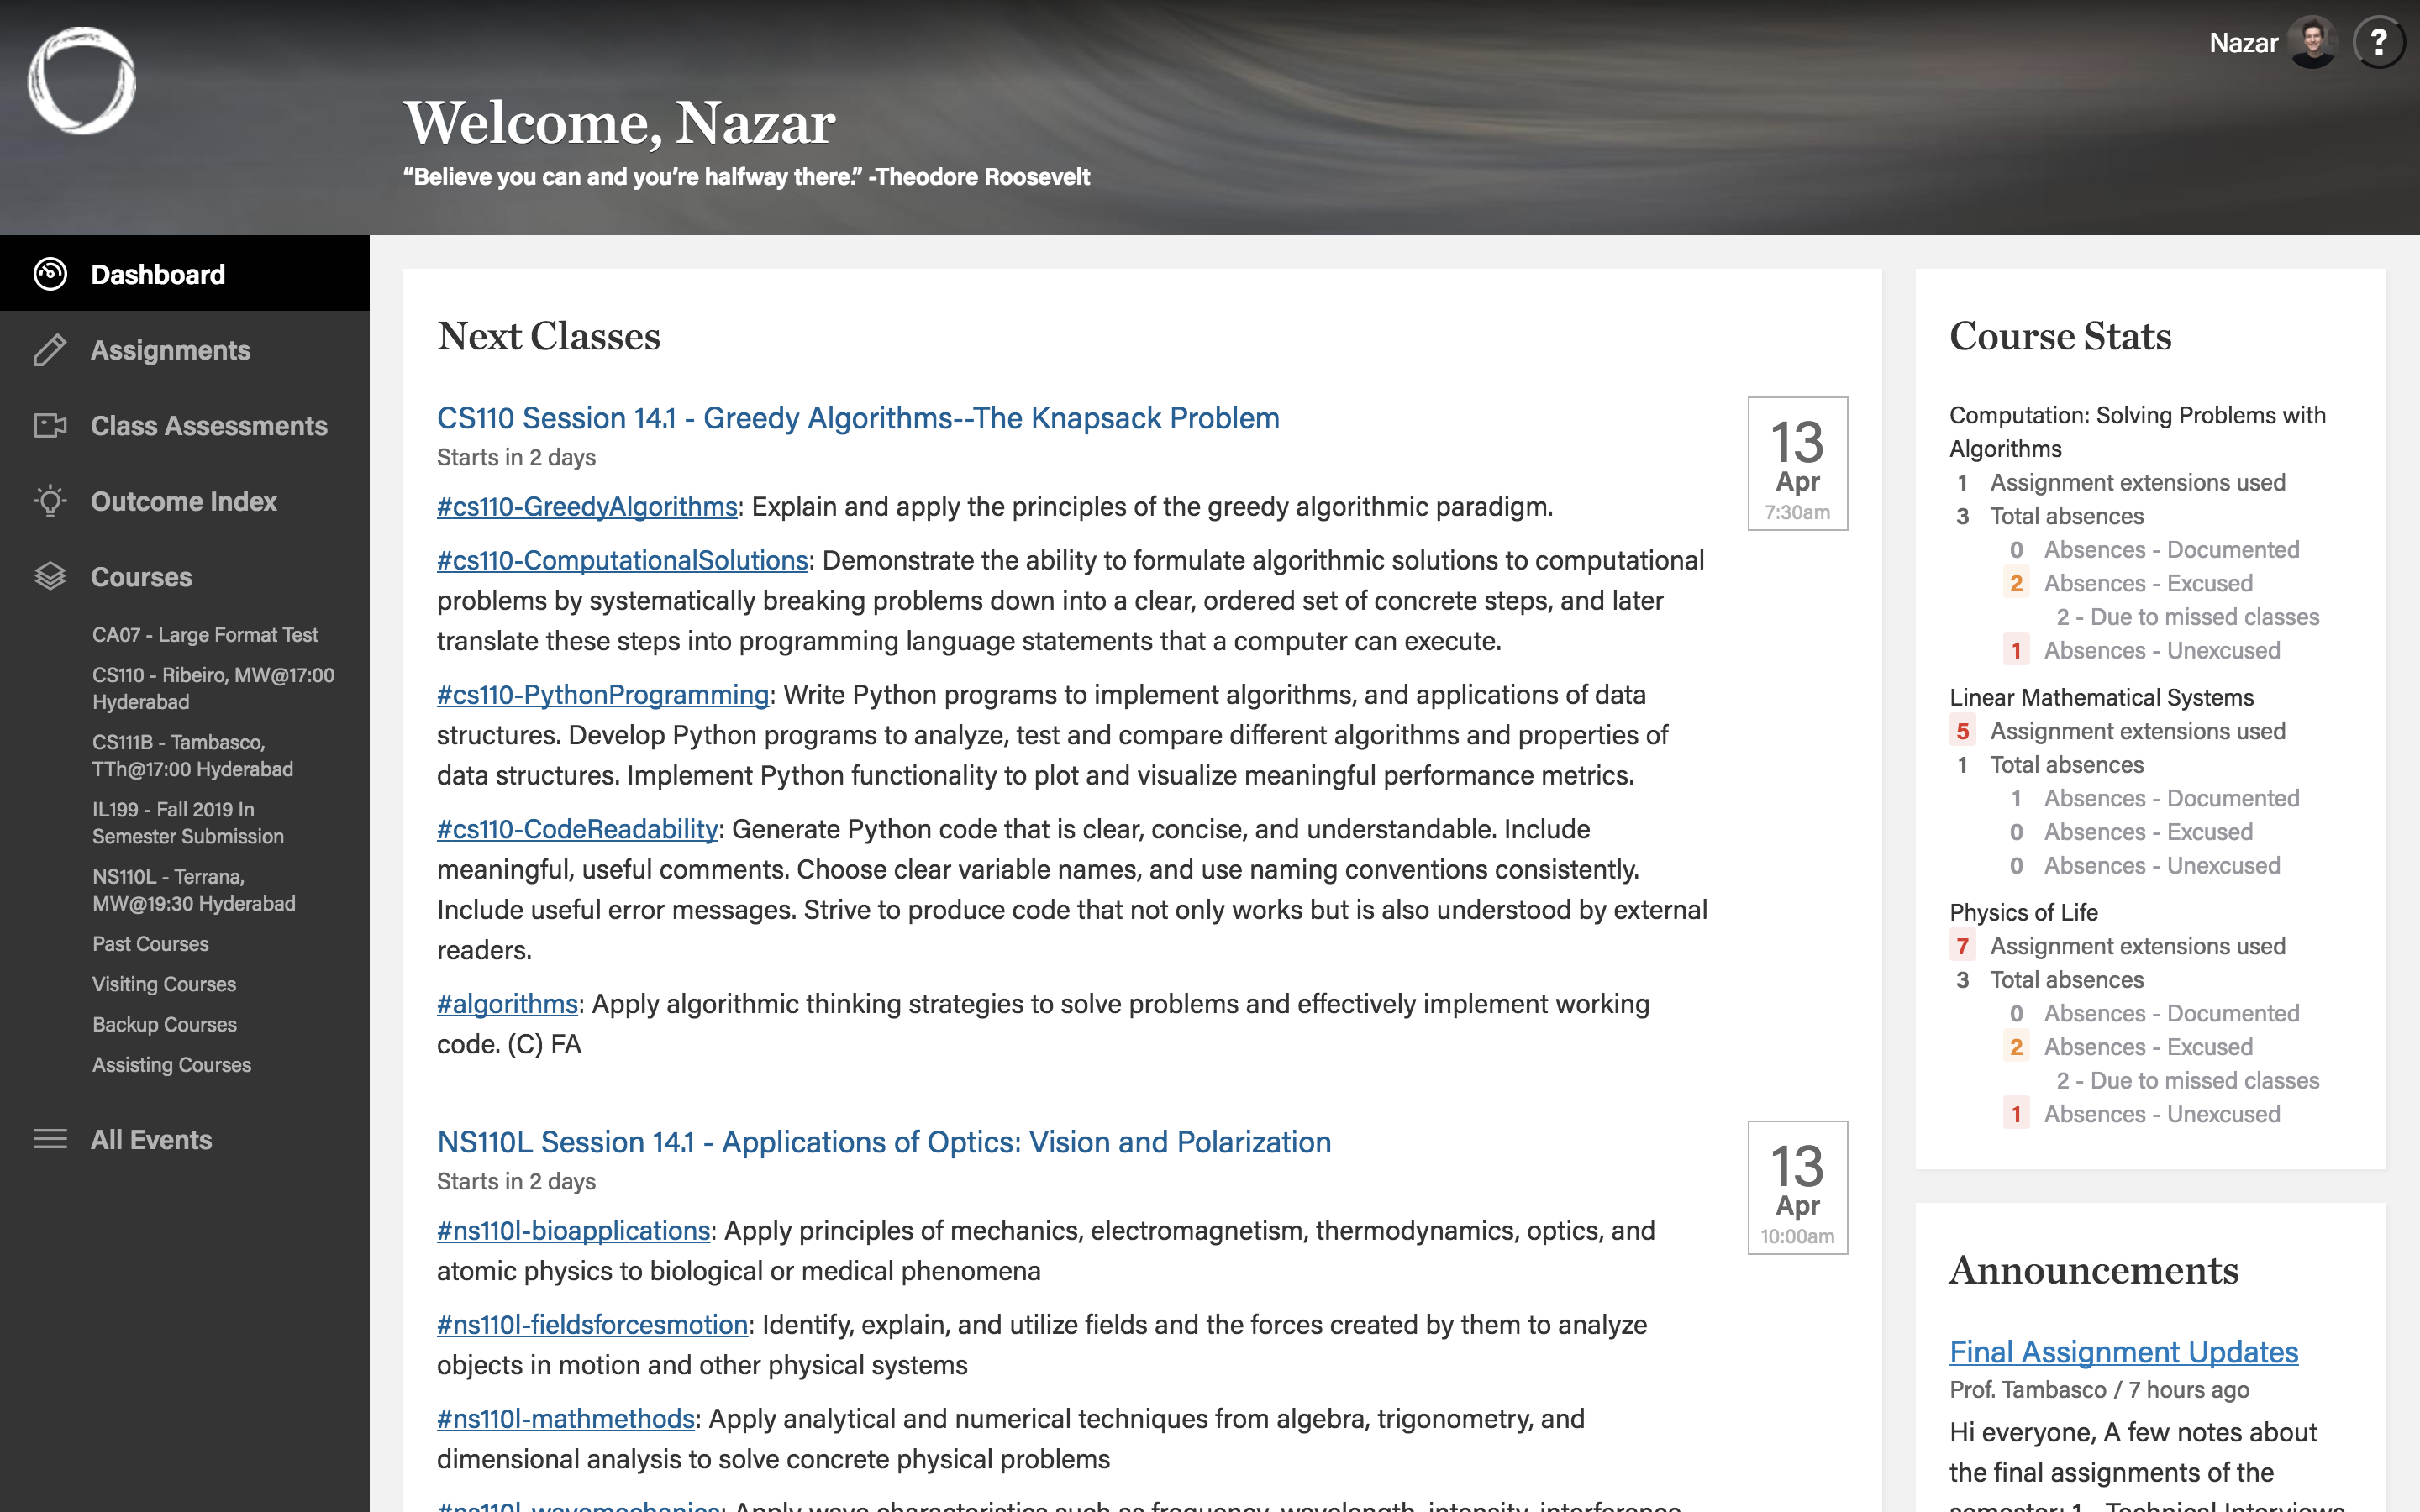

In [4]:
from IPython.display import Image
Image(filename='Screen Shot 2020-04-11 at 8.00.50 PM.png')

Note: I have already submitted the makeup work for CS110 a long time ago, and I even got an email from prof. Ribeiro that my absence had been excused, however it never changed on my dashboard. It could be connected to me asking for documented absences when I was traveling from India, but I am not sure.


## Task 2. [#DynamicProgramming, #PythonProgramming, #CodeReadability] 

Write Python code which, given any two arbitrary strings, outputs the length of the Longest Common Subsequence (LCS) for those two strings. Make sure to include a number of test cases that demonstrate that your code is correct.

In [5]:
import numpy as np
def lcs_length(x, y):
    #assigning sizes of our tables
    m = len(x)
    n = len(y)
    #creating the tables
    c = np.zeros([m+1, n+1])
    b = np.empty([m, n], dtype = '<S1')
    #starting the interations
    for i in range(1, m+1):
        for j in range(1, n+1):
            #if two items/chracters/numbers from the corresponding places in the strings are hte same
            #then return the combination of two appropriate subproblems
            if x[i-1] == y[j-1]:
                c[i, j] = c[i-1, j-1] + 1
                b[i-1, j-1] = "diagonal"
            #further, if they are not the same, moving in the approproate direction
            elif c[i-1, j] >= c[i, j-1]:
                c[i,j] = c[i-1,j]
                b[i-1, j-1] = "up"
            else:
                c[i,j] = c[i, j-1]
                b[i-1,j-1] = "left"
    return b, c


In [6]:
def longest_common_subsequence(x, y):
    """
    Gives the length of the longest common substring between strings x and y
    
    Inputs:
    - x, y: strings
    """
    #returning the length of the longest common subsequence
    b,c = lcs_length(x, y)
    return int(c[len(x), len(y)])

In [7]:
assert longest_common_subsequence('ABCBDAB', 'BDCABA')==4
assert longest_common_subsequence('abc', '') == 0
assert longest_common_subsequence('abc', 'a') == 1
assert longest_common_subsequence('abc', 'ac') == 2

## Task 3. [#DynamicProgramming] 

How many LCSs are there in Set_Strings? Generate the matrix of the lengths of the LCS for every pair of strings in Set_Strings. Make sure that your matrix obeys the following properties:
1. The matrix should be cast as a two-dimensional numpy array.  **Store this 2D numpy array to a variable named `C`**.

2. Your 2D array `C` should have dimension (7,7) and `C[i,j]` should give the length of the LCS for the $i-$th and $j-$th strings. For example, `C[0,3]` gives the length of the LCS for string `a` and string `d`.

In [9]:
#creating a list of the strings for further use
strings1 = ('AGTTATGTGTCAGAGCAAAAGATTCCTCATCTAGCGGTCGCAAGTCATTGCC', 
           'AAGTTATTTGCTCACAGGGAACGAATCCAGCTCTGCGGTCGAGGCCACATTGCC', 
           'AGTTATTTTCAGAGAAATGATTCCTTCTCACCGGTCGAGCCAGTGCC',
           'AGTTTATGTGTCAGAAGCAAAAGATTACTAATCTACGCGTCGCAAGGTCTATTCC',
           'ACAGCTTATATAGCTCATAGGGAGCGAAATCCAGCCCCGCGGTGCGAGGCCCCTTGTCGC',
           'AAGTATATGGCACGAGGGAACAGTATCAGCTCTTCGGATAAAGGCCACAGTGCC',
           'AGTTATGTGTCACAGGCAAAAGATCCTTCTCTGCGGTCGAACCCATTGCC')

#creating a table where we will store the LCSs for each pair of the strings
LCSs1 = np.zeros([7, 7])
#for each cell in the created table we find the LCS between two corresponding strings
for i in range(len(strings1)):
    for j in range(len(strings1)):
        #and put it in the table
        LCSs1[i,j] = int(lcs_length(strings1[i], strings1[j])[1][-1,-1]  )

print(LCSs1)
#here I normalize each column to find the percentage of the matching nucleotides
#I divide each number in the column by the length of the string that corresponds to that column
division = np.array([52, 54, 47, 55, 60, 54, 50])
LCSs2 = np.around(np.divide(LCSs1, division), 3)

[[52. 40. 41. 48. 39. 38. 45.]
 [40. 54. 38. 38. 47. 44. 43.]
 [41. 38. 47. 39. 36. 36. 39.]
 [48. 38. 39. 55. 38. 37. 42.]
 [39. 47. 36. 38. 60. 39. 40.]
 [38. 44. 36. 37. 39. 54. 40.]
 [45. 43. 39. 42. 40. 40. 50.]]


In [ ]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Task 4. [#DataStructures]
Manually examine the matrix you obtained above, and infer the genealogical relationships between strings (i.e., explicitly identify the great-grandparent, grandparent, parent and child strings) using **at least** two strategies: one that  is **local** and another that is **global**. A local strategy infers the location of a particular string in the tree based on a property (of your choice) of the node itself. A global strategy infers the whole tree based on a metric obtained by considering all the relationships involved in that tree at once. You may need to research what a good metric could be to describe global relationships (i.e., beyond what was discussed in class). 

After describing and implementing your strategies, draw the resulting genealogy binary tree(s) associated with Set_Strings resulting from each strategy. Comment on whether the results are expected to be the same or different and provide a concise explanation for these results. 

**To accomplish this task**, I decided to take an alternative approach, and instead of just only calculating the longest common subsequences, I will also suggest two other algorithms that have been created at the end of 20th century and are quite often used in bioinformatics right now - those are Needleman-Wunsch and Smith-Waterman algorithms. These algorithms are used to align the DNA sequences by using dynamic programming (the reason why DNA alignment is a valid problem for a dynamic programming approach will be discussed later). Such approach is better than simply calculating longest common subsequences because a) we can align the sequences and see specifically what nucleotides were deleted/inserted and which nucleotides are simply mismatched AND b) we can count evolutionary distance (number of differences between the sequences in terms of indels/mismatches) effectively (because we distinguish between different kinds of mutations) to establish genealogical relationships between different strings. After I introduce these two algorithms, I will proceed to the task and create the genealogical trees using global and local strategies and use the information obtained from LCS and evolutionary distance matrices from global and local alignments.

**Needleman–Wunsch algorithm (Needleman–Wunsch algorithm, 2020)**  
This algorithm is used to align entire sequences optimally. To accomplish that, it uses a scoring matrix for which arbitrary numbers are chosen - the points for a match, and the penalty for a gap or a mismatch (I chose the same numbers for both optimal global alignments). In the beginning, the first cell of the scoring matrix is set to be 0, and the first row/first columns are then assigned certain numbers that depend on the value of the gap penalty we chose. For instance, if the gap penalty is -3, the first row and the first column will be 0, -3, -6, -9, and so on, because we are essentially using the gap value from one of the sequences and going along the second sequence (this is because at the beginning of the code we append an empty string at the beginning of the sequence). Further, we assign each cell with a score based on the cell that is to its left, right, and diagonally up to the left (in each case, we take into account the gap/mismatch penalty or the match points depending on whether the nucleotides match). We pick the maximum score and insert it in the cell and move along. Finally, we start in the right bottom corner and follow the lines that we assign to matrix b and recreate the final aligned sequences (if we move diagonally, we insert the nucleotides, and if we move to the left/up, we insert a nucleotide and an underscore, depending on whether it is up or to the left). Such an approach allows us to identify exactly were the deletions, insertions, and mismatches happen in the process of the gene mutation.

In [10]:
#Needleman–Wunsch algorithm
def global_alignment(x, y):
    #inserting an empty character in the beginning to correctly initiate a scoring matrix
    x = ' '+x
    y = ' '+y
    #assigning the lengths of the strings
    m = len(x)
    n = len(y)
    #creating two tables for to calculate evolutionary distances and print the aligned sequences
    c = np.zeros([m, n], dtype = int)
    b = np.empty([m, n], dtype = '<S1')
    #DESCRIBE #scores for the cases of match/mismatch/gap
    mch = 2
    msmch = -3
    gap = -3
    #initiating the first values in the scoring matrix
    c[1, 0] = c[0, 1] = gap
    b[1, 0] = b[0, 1] = b[0, 0] = 'N/A'
    #here we fill in the first column and row of the scoring matrix with the corresponding scores
    #this step will be explained later
    for i in range(2, len(x)):
        c[i, 0] = c[i-1,0] + gap
        b[i, 0] = "N/A"
    for i in range(2, len(y)):
        c[0, i] = c[0,i-1] + gap
        b[0, i] = "N/A"
    #here we start assigning scores
    for i in range(1, m):
        for j in range(1, n):
            #if the nucleotides match
            if x[i] == y[j]:
                #we pick the most optimal next step: skipping one of the nucleotides or including the 
                #matching nucleotide in the final aligned sequence
                #depending on the choice, we insert d, u or l in the matrix b
                if c[i-1, j-1] + mch >= c[i-1, j] + gap and c[i-1, j-1] + mch >= c[i, j-1] + gap:
                    c[i,j] = c[i-1,j-1]+ mch
                    b[i,j] = "d"
                if c[i-1, j-1] + mch < c[i-1, j] + gap and c[i-1, j] + gap > c[i, j-1] + gap:
                    c[i,j] = c[i-1, j] + gap
                    b[i,j] = "u"
                if c[i-1, j] + gap < c[i, j-1] + gap and c[i-1, j-1] + mch < c[i, j-1] + gap:
                    c[i,j] = c[i,j-1]+  gap
                    b[i,j] = "l"
            else:
                #here we do the same procedure as before, however, this time the nucleotides don't match
                #because of that we change mch to msmch, because there is a penalty acossiated with the mismatches
                if c[i-1, j-1] + msmch >= c[i-1, j] + gap and c[i-1, j-1] + msmch >= c[i, j-1] + gap:
                    c[i,j] = c[i-1,j-1]+ msmch
                    b[i,j] = "d"
                if c[i-1, j-1] + msmch < c[i-1, j] + gap and c[i-1, j] + gap > c[i, j-1] + gap:
                    c[i,j] = c[i-1, j] + gap
                    b[i,j] = "u"
                if c[i-1, j] + gap < c[i, j-1] + gap and c[i-1, j-1] + msmch < c[i, j-1] + gap:
                    c[i,j] = c[i,j-1]+ gap
                    b[i,j] = "l"
    #returning the matrices
    return c, b
                
global_alignment("GATTACA", "GCATGCU") 

(array([[  0,  -3,  -6,  -9, -12, -15, -18, -21],
        [ -3,   2,  -1,  -4,  -7, -10, -13, -16],
        [ -6,  -1,  -1,   1,  -2,  -5,  -8, -11],
        [ -9,  -4,  -4,  -2,   3,   0,  -3,  -6],
        [-12,  -7,  -7,  -5,   0,   0,  -3,  -6],
        [-15, -10, -10,  -5,  -3,  -3,  -3,  -6],
        [-18, -13,  -8,  -8,  -6,  -6,  -1,  -4],
        [-21, -16, -11,  -6,   0,  -3,  -4,  -4]]),
 array([[b'N', b'N', b'N', b'N', b'N', b'N', b'N', b'N'],
        [b'N', b'd', b'l', b'l', b'l', b'd', b'l', b'l'],
        [b'N', b'u', b'd', b'd', b'l', b'l', b'l', b'l'],
        [b'N', b'u', b'd', b'u', b'd', b'l', b'l', b'l'],
        [b'N', b'u', b'd', b'u', b'd', b'd', b'd', b'd'],
        [b'N', b'u', b'd', b'd', b'u', b'd', b'd', b'd'],
        [b'N', b'u', b'd', b'u', b'u', b'd', b'd', b'l'],
        [b'N', b'u', b'u', b'd', b'', b'l', b'u', b'd']], dtype='|S1'))

In [11]:
#These are the additonal functions I made to flip the sequences
#because we start assembling them from the end of the table
def convert(s): 
    #initialization of string to "" 
    new = "" 
    #traverse in the string  
    for x in s: 
        new += x  
    #return string  
    return new[::-1] 

def findDist(string_pair):
    #initializa the count to be 0
    count = 0
    #then for every not matching pair of two strings we increment the count by 1
    for i in range(len(string_pair[0])):
        if string_pair[0][i] != string_pair[1][i]:
            count += 1
    #we return the percentage of the not matching nucleotides
    return round(count/len(string_pair[0]), 2)

In [12]:
def align1(b,x,y,i,j, lst1, lst2):
    if i == 0 or j == 0:
        return None
    #here we moving from the right lower corner of table b and if the cells is b'd'
    #we add this value to the list
    if b[i, j] == b'd':
        lst1.append(x[i-1])
        lst2.append(y[j-1])
        align1(b, x,y, i-1, j-1, lst1, lst2)
    #otherwise we follow the direction (either left or up)
    elif b[i,j] == b'u':
        lst1.append(x[i-1])
        #if we skip the nucleotide on the horizontal axis, we add "_" to the second list 
        lst2.append('_')
        align1(b, x, y,i-1, j, lst1, lst2)
    else:
        #if we skip the nucleotide on the vertical axis, we add "_" to the first list
        lst1.append('_')
        lst2.append(y[j-1])
        align1(b, x,y, i, j-1, lst1, lst2)
    return(lst1, lst2)

#here we assemble the final function and return the aligned sequences
def align_global(b,x,y,i,j):
    lst1, lst2 = align1(b,x,y,i,j, [], [])
    return convert(lst1), convert(lst2)

In [13]:
#Here is what the function returns
align_global(global_alignment('AGTTATGTGTCAGAGCAAAAGATTCCTCATCTAGCGGTCGCAAGTCATTGCC', 'ACAGCTTATATAGCTCATAGGGAGCGAAATCCAGCCCCGCGGTGCGAGGCCCCTTGTCGC')[1], 
                                'AGTTATGTGTCAGAGCAAAAGATTCCTCATCTAGCGGTCGCAAGTCATTGCC', 'ACAGCTTATATAGCTCATAGGGAGCGAAATCCAGCCCCGCGGTGCGAGGCCCCTTGTCGC', 
                                len('AGTTATGTGTCAGAGCAAAAGATTCCTCATCTAGCGGTCGCAAGTCATTGCC'), len('ACAGCTTATATAGCTCATAGGGAGCGAAATCCAGCCCCGCGGTGCGAGGCCCCTTGTCGC'))


('AG_TTATGT_G_TC__A__GAGCAAAAGATTCCTCATCTAGC__GGTCGCAA_G_TCATTG_C_C',
 'AGCTTATATAGCTCATAGGGAGC_GAA_A_T_C_CAGC_CCCGCGGT_GCGAGGCCCCTTGTCGC')

The previous cell demonstrates the main strength of my approach - it tries to optimize the string alignment and find where possible insertions and deletions could happen (the underscore regions). 

In [16]:
#creating the evolutionary distance matrix for the global alignment 
distance_global = np.zeros([7, 7], dtype=object)
for i in range(0, 7):
    for j in range(0, 7):
        distance_global[i,j] = findDist(align_global(global_alignment(strings1[i], strings1[j])[1], 
                                strings1[i], strings1[j], 
                                len(strings1[i]), len(strings1[j])))

print(distance_global)



[[0.0 0.29 0.25 0.16 0.44 0.38 0.17]
 [0.29 0.0 0.28 0.36 0.23 0.23 0.2]
 [0.25 0.28 0.0 0.33 0.46 0.42 0.24]
 [0.16 0.36 0.33 0.0 0.43 0.39 0.27]
 [0.44 0.23 0.44 0.43 0.0 0.38 0.34]
 [0.38 0.23 0.42 0.39 0.38 0.0 0.32]
 [0.17 0.2 0.24 0.27 0.34 0.32 0.0]]


**Smith–Waterman algorithm (Smith–Waterman algorithm, 2020)**  
This algorithm is similar to the previous one, except it is used to align sequences locally - hence, it prioritizes strong matches between the smaller parts of the sequences instead of trying to align the entire sequence. The general approach of the algorithm is similar to Needleman–Wunsch algorithm, however, there are certain differences:  
a) There are no negative values in the scoring matrix - if the value is negative, we simply input a zero; Because of this the first row and the first column are assigned to be 0s;  
b) After finishing the scoring matrix, we strat aligning the sequences not from the end but from the biggest value in the matrix and follow the line until we reach a 0. This means that the final aligned strings are usually smaller than the input strings that we had.

In [17]:
#Here we proceed to the local alignment algorithm
#Smith–Waterman algorithm
def local_alignment(x, y):
    #the same initialization as in the previous algorithm
    x = ' '+x
    y = ' '+y
    m = len(x)
    n = len(y)
    c = np.zeros([m, n], dtype = int)
    b = np.empty([m, n], dtype = '<S1')
    #what should these scores be?
    mch = 2
    msmch = -3
    gap = -3
    b[1, 0] = b[0, 1] = b[0, 0] = 'N/A'
    #here we do not add the gap penalty to the first column and row
    #because in the local alignment there are no negative number in the scoring matrix
    for i in range(2, len(x)):
        b[i, 0] = "N/A"
    for i in range(2, len(y)):
        b[0, i] = "N/A"
    for i in range(1, m):
        for j in range(1, n):
            #here if the nucleotides match, we have the same procedure as in the previous algorithm
            if x[i] == y[j]:
                if c[i-1, j-1] + mch >= c[i-1, j] + gap and c[i-1, j-1] + mch >= c[i, j-1] + gap:
                    #the difference is that if we must make sure that the entries in the 
                    #scoring matrix are not smaller than 0
                    if c[i-1,j-1]+ mch < 0:
                        c[i,j] = c[i-1,j-1]+ mch
                    else:
                        c[i,j] = c[i-1,j-1]+ mch
                    b[i,j] = "d"
                if c[i-1, j-1] + mch < c[i-1, j] + gap and c[i-1, j] + gap > c[i, j-1] + gap:
                    #if the number that we want to input in the scoring matrix is smaller than 0,
                    #we just input 0
                    if c[i-1, j] + gap < 0:
                        c[i,j] = 0
                    else:
                        c[i,j] = c[i-1, j] + gap
                    b[i,j] = "u"
                if c[i-1, j] + gap < c[i, j-1] + gap and c[i-1, j-1] + mch < c[i, j-1] + gap:
                    if c[i, j-1] + gap < 0:
                        c[i,j] = 0
                    else:
                        c[i,j] = c[i, j-1] + gap
                    b[i,j] = "l"
            else:
                #same here, except for the nucleotides that don't match
                if c[i-1, j-1] + msmch >= c[i-1, j] + gap and c[i-1, j-1] + msmch >= c[i, j-1] + gap:
                    if c[i-1,j-1]+ msmch < 0:
                        c[i,j] = c[i-1,j-1]+ msmch
                    else:
                        c[i,j] = c[i-1,j-1]+ msmch
                    b[i,j] = "d"
                if c[i-1, j-1] + msmch < c[i-1, j] + gap and c[i-1, j] + gap > c[i, j-1] + gap:
                    if c[i-1, j] + gap < 0:
                        c[i,j] = 0
                    else:
                        c[i,j] = c[i-1, j] + gap
                    b[i,j] = "u"
                if c[i-1, j] + gap < c[i, j-1] + gap and c[i-1, j-1] + msmch < c[i, j-1] + gap:
                    if c[i, j-1] + gap < 0:
                        c[i,j] = 0
                    else:
                        c[i,j] = c[i, j-1] + gap
                    b[i,j] = "l"
    return c, b

In [18]:
#this function is used to printed the locally aligned strings
#because we don't start from the end of the table, but from the biggest number in it
def findMax(c):
    i = np.argmax(c)//np.size(c, 1) 
    j = np.argmax(c)%np.size(c, 1)
    return i, j

#the same procedure as before, however we start at the largest number
def align2(b,x,y,i,j, lst1, lst2):
    if i == 0 or j == 0:
        return None
    if b[i, j] == b'd':
        lst1.append(x[i-1])
        lst2.append(y[j-1])
        align2(b, x,y, i-1, j-1, lst1, lst2)
    elif b[i,j] == b'u':
        lst1.append(x[i-1])
        lst2.append('_')
        align2(b, x, y,i-1, j, lst1, lst2)
    elif b[i,j] == b'l':
        lst1.append("_")
        lst2.append(y[j-1])
        align2(b, x, y,i, j-1, lst1, lst2)
    return(lst1, lst2)

#assembling the final function and returning that aligned strings
def print_local(b,x,y,indeces):
    lst1, lst2 = align2(b,x,y,indeces[0],indeces[1], [], [])
    return convert(lst1), convert(lst2)

In [19]:
#Here is what the function returns
print_local(local_alignment('AGTTATGTGTCAGAGCAAAAGATTCCTCATCTAGCGGTCGCAAGTCATTGCC', 'ACAGCTTATATAGCTCATAGGGAGCGAAATCCAGCCCCGCGGTGCGAGGCCCCTTGTCGC')[1], 
                                      'AGTTATGTGTCAGAGCAAAAGATTCCTCATCTAGCGGTCGCAAGTCATTGCC', 
                                      'ACAGCTTATATAGCTCATAGGGAGCGAAATCCAGCCCCGCGGTGCGAGGCCCCTTGTCGC', 
                                      findMax(local_alignment('AGTTATGTGTCAGAGCAAAAGATTCCTCATCTAGCGGTCGCAAGTCATTGCC', 'ACAGCTTATATAGCTCATAGGGAGCGAAATCCAGCCCCGCGGTGCGAGGCCCCTTGTCGC')[0]))


('AG_TTATGT_G_TCAGAG', 'AGCTTATATAGCTCATAG')

As we can see, the function returns a much smaller but an optimal **locally** aligned string - this means that it prefers quality over quantity, meaning that it would return a smaller pair of strings that are more similar rather than a larger pair of strings that is less similar.

In [20]:
#here we print out the evolutionary distance matrix for the locally aligned strings
distance_local = np.zeros([7, 7], dtype=object)
for i in range(0, 7):
    for j in range(0, 7):
        distance_local[i,j] = findDist(print_local(local_alignment(strings1[i], strings1[j])[1], 
                                      strings1[i], 
                                      strings1[j], 
                                      findMax(local_alignment(strings1[i], strings1[j])[0])))
print(distance_local)

[[0.0 0.29 0.25 0.16 0.28 0.24 0.17]
 [0.29 0.0 0.26 0.21 0.21 0.23 0.2]
 [0.25 0.26 0.0 0.27 0.42 0.41 0.24]
 [0.16 0.21 0.27 0.0 0.27 0.3 0.22]
 [0.28 0.21 0.42 0.27 0.0 0.33 0.33]
 [0.24 0.23 0.41 0.3 0.33 0.0 0.32]
 [0.17 0.2 0.24 0.22 0.33 0.32 0.0]]


Finally, we have three different matrices that can be used in various scenarios. LCSs approach is great because it does its job in quantifying the similarities between the strings. It can also be used for a variety of other problems (for example, it is also popular in computational linguistics). Further, the global and the local sequence alignments are used depending on what is the nature of the problem - in some situations, the optimization of the entire sequence is key (for instance, when we care about the overall similarity between two genotypes), whereas, in other scenarios, the researchers care about similarities between smaller fractions of the sequence (for example when they want to find out whether two proteins share a specific amino acid). Hence, we can predict that local alignment method will probably not be the most optimal one given that it will discard large chunks of the sequences to try and make them as similar as possible. 

In [22]:
print("Longest Common Subsequence matrix:")
print(LCSs2)
print(LCSs2.sum(axis=1))
print("________________________")
print("Global alignment matrix:")
print(distance_global)
print(distance_global.sum(axis=1))
print("________________________")
print("Local Alignment matrix:")
print(distance_local)
print(distance_local.sum(axis=1))
print("________________________")

Longest Common Subsequence matrix:
[[1.    0.741 0.872 0.873 0.65  0.704 0.9  ]
 [0.769 1.    0.809 0.691 0.783 0.815 0.86 ]
 [0.788 0.704 1.    0.709 0.6   0.667 0.78 ]
 [0.923 0.704 0.83  1.    0.633 0.685 0.84 ]
 [0.75  0.87  0.766 0.691 1.    0.722 0.8  ]
 [0.731 0.815 0.766 0.673 0.65  1.    0.8  ]
 [0.865 0.796 0.83  0.764 0.667 0.741 1.   ]]
[5.74  5.727 5.248 5.615 5.599 5.435 5.663]
________________________
Global alignment matrix:
[[0.0 0.29 0.25 0.16 0.44 0.38 0.17]
 [0.29 0.0 0.28 0.36 0.23 0.23 0.2]
 [0.25 0.28 0.0 0.33 0.46 0.42 0.24]
 [0.16 0.36 0.33 0.0 0.43 0.39 0.27]
 [0.44 0.23 0.44 0.43 0.0 0.38 0.34]
 [0.38 0.23 0.42 0.39 0.38 0.0 0.32]
 [0.17 0.2 0.24 0.27 0.34 0.32 0.0]]
[1.69 1.59 1.98 1.94 2.26 2.1199999999999997 1.54]
________________________
Local Alignment matrix:
[[0.0 0.29 0.25 0.16 0.28 0.24 0.17]
 [0.29 0.0 0.26 0.21 0.21 0.23 0.2]
 [0.25 0.26 0.0 0.27 0.42 0.41 0.24]
 [0.16 0.21 0.27 0.0 0.27 0.3 0.22]
 [0.28 0.21 0.42 0.27 0.0 0.33 0.33]
 [0.24 0.23 0.

**Global Strategy**  
The global strategy I will take relies on the structure of the binary genealogical tree and the distances between the nodes in it. We can find out how far each node is from the rest of the nodes OVERALL, by adding the numbers in the rows of the matrices we previously described. An important distinction needs to be made: for the LCSs matrix, we will be looking at the common subsequences, so the row with the highest sum of its row will correspond to the root of the genealogical tree, On the other hand, for the global and local alignment distance matrices, because we are talking about the differences between the sequences, the row with the smallest sum will correspond to the root of the tree, because such node will have the smallest distance to all other nodes. Further, the rows with the smallest sums of the rows for the LCSs matrix and largest sums of the rows for the global and local alignment will represent the leaves of the tree because they have the least amount of identical nucleotides with other nodes or the largest evolutionary distances from the rest of the nodes. The children will be the two nodes we have left. Further, we can create a tree using the resulting classification. The last step would be identifying where the leaf nodes supposed to be placed - for this, we will use the matrices we created earlier and check how similar/different the leaves are from the children nodes. To visualize this process, I manually performed these steps:

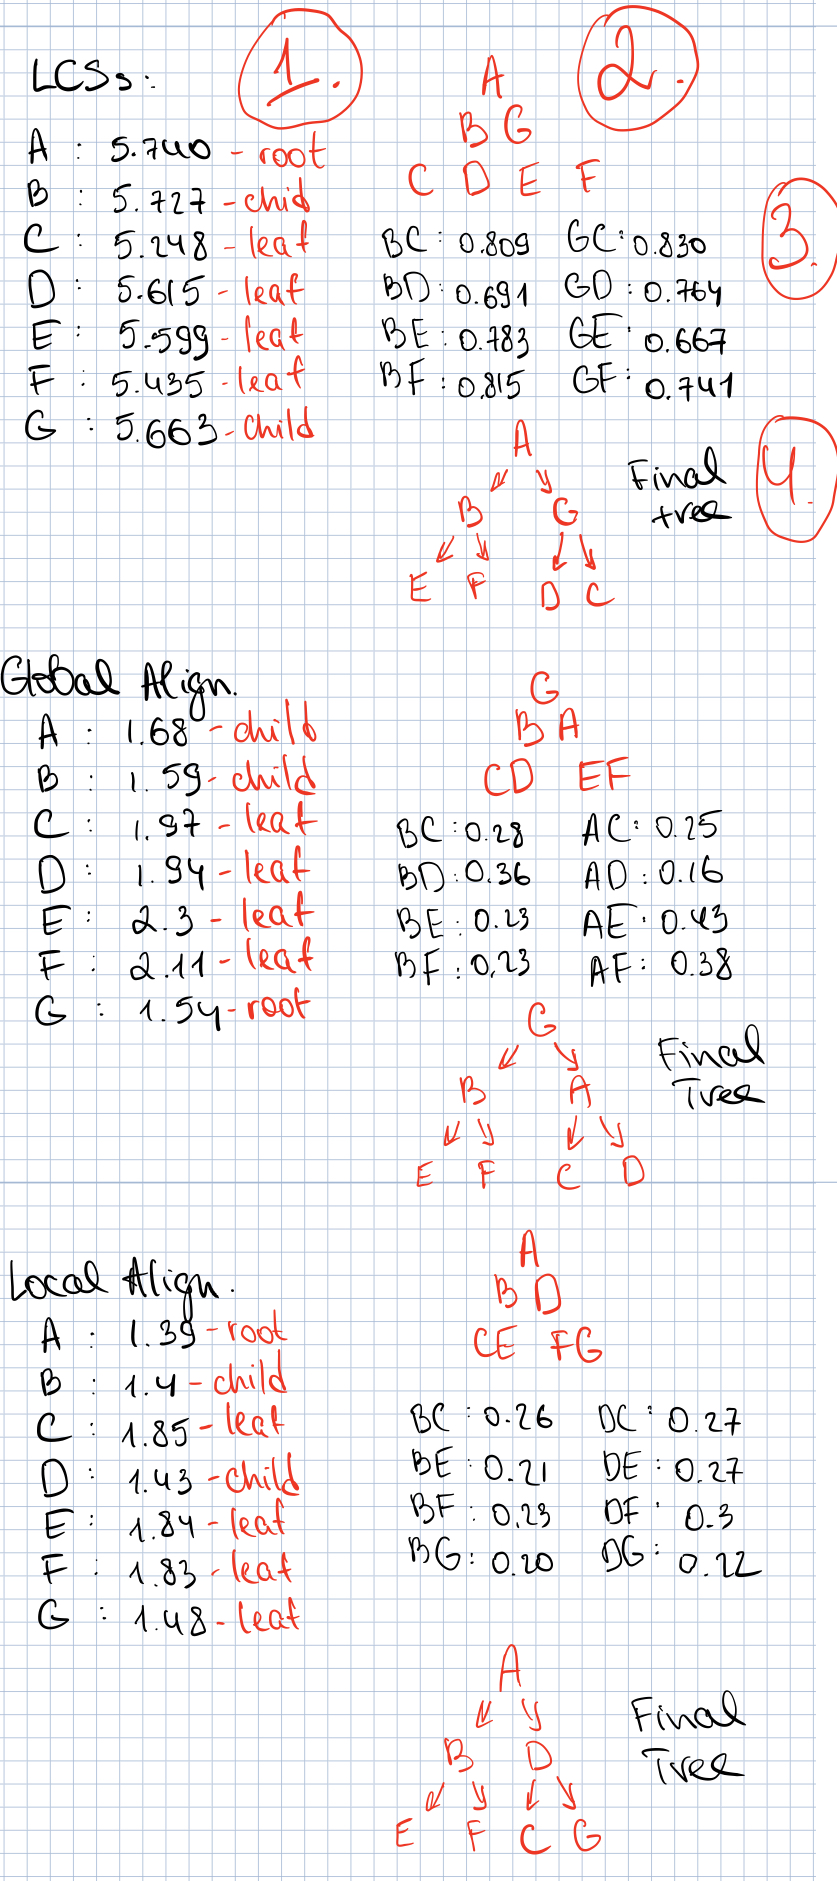

In [31]:
from IPython.display import Image
Image(filename='IMG_A862924F8B74-1.jpeg')

In each case the algorithm was the same: identifying the root, children and the leaves (1), constructing the initial tree (2), checking the individual distances between the children and the leaves (3) and creating the final trees by trying to maximize similarities/ minimize the evolutionary distance between the children and the leaves they mutate into. We can see the three resulting trees.  

A few important notes: the only tree in which I was able to place the leaves completely optimally (in the end, each child node clearly had two leaves that fit the best, and those leaves did not overlap) was the global alignment solution. In other cases, the leaves did not fit perfectly which is not surprising because it could be predicted from the previous description of the purposes of each approach: the LCSs approach does not fully take into account all different types of mutations but just calculates the similarities (which is not ideal because differences are more widely used to assess genealogical relationships) and the local alignment is better for identifying the smaller commonalities between the strings. Global alignment solution is the most optimal one theoretically because it is designed to take into account subtleties of the mutations that can happen, and as we can see, it also fits the best practically for this given problem. 

**Local strategy**  
In this task, I will proceed only with the global sequence alignment evolutionary distance matrix because, as I have already mentioned, it is the most appropriate for the given problem. Besides, it is the most convenient one because when performing the alignment the strings end up having the same size (because we insert _ to find the best alignment), so the distance matrix is symmetrical, and it does not matter whether we compare A to B or B to A (which is the case in LCS because they have a different size).  

My strategy here is to take into account the properties of the individual nodes and their relationships with other nodes. For this, I will use the distance matrix and identify the nodes that are the most similar (the smallest evolutionary distance) and the nodes that are the most different (the largest evolutionary distance). By inspecting the table, we can see that the following nodes are the most related: A&D (0.16), A&G (0.17), and B&G (0.20). Further, the most unrelated ones are A&E (0.43), C&E (0.48), C&F (0.41), and D&E (0.44). Based on these values, we get hints about the locations of the nodes in the tree. For instance, we can conclude that A, B, and G must be on top of the tree because we would expect those nodes to be the most related ones. Further, the nodes that are the least related are expected to be in the bottom of the tree (specifically on the opposite sides of the tree because sibling leaves would still be somewhat similar). Therefore, I would expect that C, E, F, and D are in the leaf nodes because they have huge evolutionary distance among each other (A is also distant from all of them, but it does not have large distances from **all** of them). Finally, we can start analyzing nodes more closing based on our assumptions about whether they are in the upper part of the tree or the lower part of the tree.  

Given the following distances - C&E (0.48), C&F (0.41), and D&E(0.44) - we can identify what part of the tree nodes C, E, F, and D are at. For that, we need to check the distances between the nodes C&D and E&F - if these are indeed siblings, we would expect the distances between them to be smaller: C&D = 0.33, E&F = 0.38. Given these values, it is plausible to assume that these are siblings because they are more closely related than C&E (0.48), C&F (0.41), D&F(0.39), and D&E (0.44). Further, we can find out what node is their parent node - let's find the distance between C&D to A, B, and G: those are 0.25/0.16, 0.28/0.36, and 0.24/0.27. We can do the same for E&F and nodes A, B, and G: 0.43/0.38, 0.23/0.23, 0.34/0.32. By looking at these values, we can conclude that it is the most likely that the parent of C&D is A and the parent of E&F is B. Finally, the parent so of A and B would be G and it works well with the initial distances that we identified (A&G (0.17) and B&G (0.20)). Hence, the final tree is identical to the tree that we obtained through a global strategy that we performed for the global sequence alignment distance matrix. 

## Task 5. [#PythonProgramming, #CodeReadability, #DynamicProgramming or #GreedyAlgorithms] 

Write an algorithm in Python for the general case, which takes as input $N$ sequencing strings and outputs a genealogy binary tree associated with the $N$ strings that best exposes the relationships between them. You should test your algorithm by providing at least two simple test cases that demonstrate that your algorithmic implementation is correct. 

The approach I decided to implement in the code is mostly global but it also has elements of a local strategy in it. Overall, I will use the approach I used before according to which I find the sums of the rows and find the root of the tree. Further, I check the individual distance in the ditance matrix and substitute the values that I have already chosen by "inf" so my code did not pick the same nodes multiple times.

In [25]:
#creating the evolutionary distance matrix using the global alignment
#because it is the most appropriate for the given problem
def genealogy(strings):
    c = np.zeros([len(strings), len(strings)], dtype=object)
    for i in range(len(strings)):
        for j in range(len(strings)):
            c[i,j] = findDist(align_global(global_alignment(strings[i], strings[j])[1], 
                                strings[i], strings[j], 
                                len(strings[i]), len(strings[j])))
    
    #finding a list of sums of each row in the distance matrix
    distance_list = np.sum(c, axis = 1)
    #creating a table for distances in which we will have the names of the strings
    #and the corresponding distance sums for each string
    distance_table = np.zeros([2, len(strings)], dtype=object)
    string_names = list(range(0, len(strings)))
    for i in range(len(string_names)):
        distance_table[0, i] = string_names[i]
        distance_table[1, i] = round(distance_list[i], 3)
    
    #to prevent our code choosing 0s when we pick the smallest values
    #I substitute the diagonal values with positive infinities
    for i in range(len(strings)):
        c[i,i] = float('inf')
    
    #creating the genalogy list which will have the indeces of the strings
    #that we will be used to assemble the final tree
    genealogy_list = np.zeros([1, len(strings)], dtype=object)
    #setting the index of the string that we know 
    #is the root (as we described earlier - the node
    #that corresponds to the row with the smallest distance)
    genealogy_list[0][0] = distance_table[0, np.argmin(distance_table[1,])]
    #eliminate the index that we have already used from the list of string names
    #so we could not use it again
    string_names.remove(np.argmin(distance_table[1,]))
    
    #now we go through the genealogy list and fill in the values
    #the step size here is 2, becase at every iteration we fill in the values of two nodes
    for i in range(1, len(strings), 2):
        #here we fill in the ith value by finding the node with the
        #smallest distance from the ith parent
        #in the matrix c
        genealogy_list[0][i] = np.argmin(c[genealogy_list[0][int((i-1)/2)], ])
        #here we substitute the values that we just used with 
        #"inf" so we couldn't use the same node twice
        c[np.argmin(c[genealogy_list[0][int((i-1)/2)], ]), genealogy_list[0][int((i-1)/2)]] = c[genealogy_list[0][int((i-1)/2)], np.argmin(c[genealogy_list[0][int((i-1)/2)], ])] = float('inf')
        #here we fill in the i+1th value by finding the 
        #node with teh smallest distance from the i+1th parent
        #in the matrix c
        genealogy_list[0][i+1] = np.argmin(c[genealogy_list[0][int((i+1-2)/2)], ])
        #here we substitute the values that we just 
        #used with "inf" so we couldn't use the same node twice
        c[np.argmin(c[genealogy_list[0][int((i+1-2)/2)], ]), genealogy_list[0][int((i+1-2)/2)]] = c[genealogy_list[0][int((i+1-2)/2)], np.argmin(c[genealogy_list[0][int((i+1-2)/2)], ])] = float('inf')
    
    return(genealogy_list)

genealogy(strings1)

array([[6, 0, 1, 3, 2, 4, 5]], dtype=object)

As we can see, the algorithm returns the geneaology we have previously constructed for the set of strings given in the assignment!

A few nodes:  
a) This code will only work for fully balanced and filled in binary trees;  
b) The output of the function is a list of indeces of the strings. To create a genealogy tree, we just have to put in these values in a tree as we did with heaps - 6 is the root, the next level is 0, 1 and the next level is 3,2 and 4,5. 

**TEST CASE 1**  
Here I started with a list of numbers from A to P. Then I copied it two times and inserted/changed some random letters. Then I took each of the daughter strings, copied and pasted each twice again and randomly ranged them too. My expectation is that the code will output 0, 1, 2, 3, 4, 5, 6.

In [26]:
#TEST CASE
strings2 = ('ABCDEFGHIJKLMNOP',
           'CBADEFGHIJKLMNOP',
           'ABCDEFGHIJKLMPON',
           'CBAADEFGHIJKLMNOP',
           'CBADEFGHIJKLMNNOP',
           'ABCDEFGHHIJKLMPON',
           'ABCDEFGHIJJKLMPON')

genealogy(strings2)

array([[0, 1, 2, 3, 4, 5, 6]], dtype=object)

Yay!

**TEST CASE 2**  
Here I started with a list of numbers from A to P. I did the same thing as in the previous code, however, I extended it by one level to make 15 strings and test whether the code would work for a tree with 4 levels. The expected output is a list of numbers from 0 to 14.

In [27]:
strings3 = ('ABCDEFGHIJKLMNOP',
           'CBADEFGHIJKLMNOP',
           'ABCDEFGHIJKLMPON',
           'BAADEFGHIJKLMNOP',
           'CBADEFGHIJKLMNNOP',
           'ABCDEFGHHIJKLMPON',
           'ABCDEFGHIJJKLMPON',
           'CAADEFGHIJKLMNOP',
           'CBAADEFGHIJKLMNP',
           'CBADEDEFGHIJKLMNNOP',
           'CBADEFGHIJKLMJKNNOP',
           'BBCDEFGHHIJKLMPON',
           'ABCDEFGHHIJKLMPOK',
           'LOBCDEFGHIJJKLMPON',
           'ABCDEFGHIJJKLMMPON')

genealogy(strings3)

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]], dtype=object)

Yay again!

## Task 6. [#ComputationalCritique] 

Enumerate any strengths or weaknesses of your suggested algorithm, justifying how you could improve it.

Firstly, the strength of my approach is that I am not simply considering the length of the longest common subsequence, but taking a more effective approach: considering both local and global sequence alignment techniques that allow me to calculate the evolutionary distances between the sequences. The difference between the former and the latter approaches is that my code is counting both indels (insertions or deletions of nucleotides) and mismatches, whereas in the LCS such distinction is not made. Therefore, if we consider how such algorithm would be applied in a real world scenario where we would need to perform millions of comparisons due to massive volumes of DNA data, my approach would provide a more robust and accurate result on a long run. Further, my approach is using the dynamic programming when aligning the sequences - we are creating a scoring table that utilizes the scores that have already been computed from the adjacent cells which allows us to shorten the run time significantly - instead of considering all possible combinations ($(O(2^{M})$) to simply reusing the exisitng scores and given that each score takes O(1) time, the time complexity for each alignment becomes $(O(M^{2})$. This is possible due to the nature of our problem - more specifically, the problem has an optimal substructure, because solutions to the subproblems can be used for a global solution (for instance, if we know the optimal alignment for the first 10 nucleotides of the sequence, we can use it in our global solution, because the alignment of the rest of the sequence is independent from the alignment of the first 10 nucleotides). Besides, the problem has overlapping subproblems because as we have already mentioned, when computing the scoring matrix, we can reutilize the scores calculated for smaller subsequences. Another strength of my code is that I am not simply using the values of the LCS to quantify the similarities between genes - I calculate the amount of mismatches which is called "evolutionary distance" and is a widely used term in evolutionary biology. It makes more sense, as when we are talking about mutations in large strings happening, it makes more sense to count the differences, and not the similarities between the mutated strings - for instance, if we have two strings that consist of 1 million nucleotides and there are 3 mutations, it would be wiser to count those rather than 1 million - 3 common nucleotides.  

That being said, there are definitely drawbacks and space for improvement. First of all, my code will work only for the full perfectly balanced trees - therefore the length of an input list must be 3, 7, 15, 31 and so on (these are the lengths of the perfectly balanced, fully filled in trees) - such limitation does not have a detrimental impact on the functionality of my code because there are still multiple cases where mutations happen at a constant rate producing balanced genealogical trees. Another concern that I have is that using my code would not be too convenient if we have a lot of strings because it outputs the list of the indices of the strings which we would have to put into a tree manually. Therefore, it would be useful to have another code that can construct a tree that is visually understandable. Finally, the concern I have is that my code is not perfectly accurate. The reason behind it is that when we create a scoring matrix while aligning the sequences, sometimes it happens that there are multiple routes that can be taken when we are printing the aligned sequences, so usually, two sequences can be aligned in multiple ways. My code only produces one of those alignments and it is not necessarily correct. A way to improve my code would be taking into account all possible alignments and bootstrapping a genealogy tree (bootstrapping is a technique in which we are taking multiple samples and producing a tree that is the most optimal from all possible combinations) which I would do, but I do not have enough knowledge about :(.

## Task 7. [#ComplexityAnalysis] 

What is the computational complexity of your solution to produce genealogy binary trees? You can consider $M$ to be the length of a gene, and $N$ the number of genes.

To identify the time complexity for the algorithm I wrote we can go through each component of the code and find out what the complexity of each piece is. In the beginning of the code, we create a distance matrix which we fill in with the result of the distance between every combination of two strings in the given set of strings. Generally, for each alignemnt of two strings, it takes O(1) time to calculate the score for each cell in the scoring matrix, so the overall creation of a scoring matrix takes $M*M$ time where M is the length of the string. Therefore, if we have N strings, we have to align every combination of them which is $N^{2}$ combinations. Therefore, the first piece of the code takes $O(N^{2} * M^{2})$ time. Further, we create a distance matrix which adds the sums of each row and creates a table of the sums of the distances for each node - its time complexity is $O(N)$ because the for loop runs as many times as strings we have. The last part of the code is a for loop that runs N/2 times, so its complexity is $O(N)$. Finally, we can see, that the overall time complexity will be the piece with the fastest growth and in this case it is $O(N^{2} * M^{2})$. Therefore, we can conclude that the time complexity of the genealogy tree production is $O(N^{2} * M^{2})$.  

As for the space complexity, we need to check all of the data structures that we are creating as the code proceeds. In the first part of the code, we create a scoring matrix for each pair of the sequences and the space complexity that corresponds to creating one scoring matrix is $M^{2}$. Further, because we create $N^{2}$ such matrices, the space complexity becomes $O(N^{2} * M^{2})$. Other data structures what we create include the evolutionary distance matrix ($O(N^{2})$), distance table ($O(N)$) and genealogy list ($O(N)$). Therefore, the overall space complexity would be $O(N^{2} * M^{2})$. 

## Task 8. [#ComputationalSolutions, #PythonProgramming, #CodeReadability] 

How would you estimate the probabilities of insertions, deletions, and mutations, $p_i$, $p_d$, and $p_c$, respectively? (Hint: It is obvious that you don’t have enough data to obtain meaningful estimates for large datasets, but this small dataset has enough information for you to intuitively formulate estimates for $p_i$, $p_d$, and $p_c$.) Make sure you include a working Python estimation that would take your algorithmic strategy into practice. If you obtain estimates for these probabilities, please critically assess the results you obtained. 


In [29]:
#Luckily, because I was using the global alignment, I can easily count
#the insertions, deletions and mismatches
#I created these functions to do it in the next cell

def countInsertions(str1, str2):
    #for each function we have to align the strings
    aligned_strings = align_global(global_alignment(str1, str2)[1], str1,str2, len(str1), len(str2))
    count = 0
    #here, every time there is an underscore in the first string
    #we assume that it is the place where a new nucleotide was inserted
    #so we increment the count by 1
    for i in aligned_strings[0]:
        if i == "_":
            count += 1
    #returning the % of insertions
    return round(count/len(aligned_strings[0]) * 100, 2)

def countDeletions(str1, str2):
    aligned_strings = align_global(global_alignment(str1, str2)[1], str1,str2, len(str1), len(str2))
    count = 0
    #here, the same approach as before, but we increment the count for every time
    #there is an underscore in the second string
    #because we assume that it means that it is a place where a nucleotide
    #was deleted form the first string
    for i in aligned_strings[1]:
        if i == "_":
            count += 1
    return round(count/len(aligned_strings[0]) * 100, 2)

def countMismatches(str1, str2):
    aligned_strings = align_global(global_alignment(str1, str2)[1], str1,str2, len(str1), len(str2))
    count = 0
    #here we increment the count every time there are two nucleotides
    #that don't match
    for i in range(len(aligned_strings[0])):
        if aligned_strings[0][i] != aligned_strings[1][i]:
            count += 1
    return round(count/len(aligned_strings[0]) * 100, 2)

In [30]:
def probabilities(strings):
    #creating the geneaology tree
    gen_list = genealogy(strings)
    #initializing three empty lists
    list_of_insertions = []
    list_of_deletions = []
    list_of_mutations = []
    #here we go intil the last node in the second to last level of the tree
    for i in range(0, int(len(strings)/2 - 2) + 1):
        #we appen the number of insertions, deletions, and mismatched
        #between every parent and it's child in the tree
        #this is why we have 6 lines: each type of mutation for each child
        list_of_insertions.append(countInsertions(strings[gen_list[0][i]], strings[gen_list[0][i*2 + 1]]))
        list_of_insertions.append(countInsertions(strings[gen_list[0][i]], strings[gen_list[0][i*2 + 2]]))
        list_of_deletions.append(countDeletions(strings[gen_list[0][i]], strings[gen_list[0][i*2 + 1]]))
        list_of_deletions.append(countDeletions(strings[gen_list[0][i]], strings[gen_list[0][i*2 + 2]]))
        list_of_mutations.append(countMismatches(strings[gen_list[0][i]], strings[gen_list[0][i*2 + 1]]))
        list_of_mutations.append(countMismatches(strings[gen_list[0][i]], strings[gen_list[0][i*2 + 2]]))
    #printing the corresponding statements by taking the averages form each list 
    print('The probability of insertion mutations in a genealogy tree created by the given strings is', round(sum(list_of_insertions)/len(list_of_insertions), 2),"%")
    print('The probability of deletion mutations in a genealogy tree created by the given strings is', round(sum(list_of_deletions)/len(list_of_deletions), 2),"%")
    print('The probability of nucleotide change mutations in a genealogy tree created by the given strings is', round(sum(list_of_mutations)/len(list_of_mutations), 2),"%")
    
probabilities(strings1)

#I also checked whether my code is working by printing the statement for the strings
#that I created myself - I remembered that I did not delete any elements and YES, the 
#percentage of deletion is 0!

print("_________________")
probabilities(strings2)



The probability of insertion mutations in a genealogy tree created by the given strings is 6.37 %
The probability of deletion mutations in a genealogy tree created by the given strings is 5.1 %
The probability of nucleotide change mutations in a genealogy tree created by the given strings is 19.34 %
_________________
The probability of insertion mutations in a genealogy tree created by the given strings is 2.94 %
The probability of deletion mutations in a genealogy tree created by the given strings is 0.0 %
The probability of nucleotide change mutations in a genealogy tree created by the given strings is 9.19 %


As we can see, the probabilities in the given set of strings we were given are: 6.37% for insertions, 5.1% for deletions and 19.34% for nucleotide changes. Such probabilities are definitely not realistic for the real biological systems because usually mutations happen once per approximately $10^{8}$ nucleotides. However, it is obvious that for the purposes of this assignment such numbers were not feasible, so the probabilities of insertions, deletions and nucleotide changes must have been bigger to be able to identify genealogical relationships between the strings.

**References**  
Needleman–Wunsch algorithm. (2020, April 5). Retrieved April 11, 2020, from https://en.wikipedia.org/wiki/Needleman–Wunsch_algorithm  
Smith–Waterman algorithm. (2020, March 8). Retrieved April 11, 2020, from https://en.wikipedia.org/wiki/Smith–Waterman_algorithm

**Appendix A: HC applications**  
**#context:** I think that this HC was applied throughout this assignment as I did not simply answer the question but digged a little deeper into the context of sequence alignment and found two fundamental algorithms that are used to compare how simialr different DNA sequences are. This significantly improved the quality of my assignment and allowed me to learn lots of cool things about the field and history of bioinformatics.  
**#optimization**: My choice of using the Needleman–Wunsch algorithm demonstrates a great application of this HC. Because I was able to explicitly identify where the insertions, deletions and mutations could have ocurred the last question of the assignment was easy for me as I could iterate through the pair of sequences and explicitly count different kinds of mutations without any unnecessary assumptions. Not only I used this algorithm, but I also provided sufficient explanation and pointed out multiple reasons why it is better for comparing the sequences.  
**#critique**: In this assignment I actively critiqued different approaches that can be taken to create the genealogy algorithms. Not only I introduced new algorithms that were not provided in the assignment but also I highlighted their strengths and weaknesses and explained why or why not they work for this given problem. For instance, I explained how global alignment fits this problem because we want to learn about similarity of the entire sequences instead of just getting more optimized but shortened aligned subsequences which is what the local alignment basically does. 